# Módulo 11 - Classificação Naive Bayes

In [1]:
# IMPORTAÇÕES

# EDA
import pandas as pd
import statsmodels.api as sm
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import sweetviz as sv

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, recall_score

# Otimização de Hiperparêmetros
import optuna

# Salvar modelo
import joblib

### Bloco 1 - EDA

#### Carga dos Dados

Nesta aula, começamos um projeto prático de algoritmo de Naive Base. Nosso objetivo é criar um modelo que possa prever se uma pessoa é obesa ou não com base em suas características. Mostramos a estrutura do projeto, com um conjunto de dados para treinamento, um dicionário de dados explicando as colunas e um arquivo de exemplo para chamada de API. Também introduzimos a importação das bibliotecas necessárias, como pandas, plotly, matplotlib, scikit-learn, flask, entre outras. Carregamos o conjunto de dados e exploramos suas colunas e estrutura. Nas próximas aulas, continuaremos a desenvolver o projeto

In [2]:
# carregar dataset
df_obesidade = pd.read_csv('../datasets/dataset_obesidade.csv')

# mostrar dataframe
df_obesidade.head(8)

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,Nivel_Atividade_Fisica,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obeso
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0
5,1,29.0,0,1,2.0,3.0,1,0,2.0,0,0.0,0.0,1,1,0,0,0,0,0
6,0,23.0,1,1,3.0,3.0,1,0,2.0,0,1.0,0.0,1,0,0,1,0,0,0
7,1,22.0,0,0,2.0,3.0,1,0,2.0,0,3.0,0.0,1,0,0,0,1,0,0


In [3]:
# exibir estrutura de dados do dataframe
df_obesidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Genero_Masculino                     2111 non-null   int64  
 1   Idade                                2111 non-null   float64
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64  
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64  
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   float64
 5   Refeicoes_Dia                        2111 non-null   float64
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64  
 7   Fumante                              2111 non-null   int64  
 8   Consumo_Agua                         2111 non-null   float64
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64  
 10  Nivel_Atividade_Fisica               2111 non-null   float64
 11  Nivel_Uso_Tela                

**Dicionário de Dados - Dataset Obesidade**

- `Genero_Masculino` é 1 se o entrevistado for do sexo masculino e 0 se for do sexo feminino.
- `Idade` é a idade do entrevistado em anos.
- `Historico_Familiar_Sobrepeso` é 1 se o entrevistado tem um membro da família que está ou já esteve com excesso de peso, 0 se não tiver.
- `Consumo_Alta_Caloria_Com_Frequencia` é 1 se o entrevistado consome alimentos ricos em calorias com frequência, 0 se não.
- `Consumo_Vegetais_Com_Frequencia` é 1 se o entrevistado geralmente consome vegetais nas refeições, 0 se não.
- `Refeicoes_Dia` representa quantas refeições principais o entrevistado faz diariamente (0 para 1-2 refeições, 1 para 3 refeições e 2 para mais de 3 refeições).
- `Consumo_Alimentos_entre_Refeicoes` representa quanto alimento o entrevistado consome entre as refeições em uma escala de 0 a 3.
- `Fumante` é 1 se o entrevistado fuma, 0 se não.
- `Ingestao_Agua` representa quanto líquido o entrevistado consome em uma escala de 0 a 2.
- `Monitora_Calorias_Ingeridas` é 1 se o entrevistado monitora sua ingestão calórica, 0 se não.
- `Nivel_Atividade_Fisica` representa quanto atividade física o entrevistado realiza em uma escala de 0 a 3.
- `Nivel_Uso_Tela` representa quanto tempo o entrevistado passa olhando para dispositivos com telas em uma escala de 0 a 2.
- `Consumo_Alcool` representa com que frequência o entrevistado consome álcool em uma escala de 0 a 3.
- `Transporte_Automovel` indica que o meio de transporte principal é Automóvel
- `Transporte_Bicicleta` indica que o meio de transporte principal é Bicicleta
- `Transporte_Motocicleta` indica que o meio de transporte principal é Motocicleta
- `Transporte_Publico` indica que o meio de transporte principal é transporte público (Ônibus, Trem, Metrô)
- `Transporte_Caminhada` indica que o meio de transporte principal é Caminhada
Obeso é 1 se o paciente for obeso e 0 se não for.

#### Análise Exploratória - Quantitativas

Neste vídeo, começamos a análise exploratória de dados do nosso dataset. Primeiro, convertemos algumas variáveis do tipo float para int64, já que elas representam valores inteiros. Em seguida, verificamos se havia valores ausentes em todas as colunas e constatamos que não havia.

Em seguida, iniciamos o EDA (Exploratory Data Analysis) analisando a distribuição da variável alvo, que é a obesidade. Utilizamos o Plotly para criar um gráfico de barras mostrando a contagem de valores para cada classe de obesidade. Observamos que as classes estão bem balanceadas, o que é uma boa notícia, pois não precisaremos aplicar técnicas para tratar desbalanceamento de dados.

Também calculamos a porcentagem de cada classe e confirmamos que a base não está desbalanceada.

Em seguida, realizamos uma análise univariada da variável idade. Criamos um histograma para visualizar a distribuição dos valores e um boxplot para identificar outliers. Observamos que a maioria dos entrevistados tem entre 15 e 28 anos, com a mediana da idade sendo 22 anos. Identificamos alguns outliers acima de 37 anos, mas decidimos mantê-los, pois são dados legítimos.

In [4]:
# converter variáveis para tipo'interiro'
lista_colunas_to_int = [
    'Idade', 'Consumo_Vegetais_Com_Frequencia', 'Refeicoes_Dia', 'Consumo_Agua', 'Nivel_Atividade_Fisica', 'Nivel_Uso_Tela']

df_obesidade[lista_colunas_to_int] = df_obesidade[lista_colunas_to_int].astype(int)

# alterar o nome da coluna da variável target
df_obesidade.rename(columns={'Obeso': 'Obesidade'}, inplace=True)

df_obesidade.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Genero_Masculino                     2111 non-null   int64
 1   Idade                                2111 non-null   int32
 2   Historico_Familiar_Sobrepeso         2111 non-null   int64
 3   Consumo_Alta_Caloria_Com_Frequencia  2111 non-null   int64
 4   Consumo_Vegetais_Com_Frequencia      2111 non-null   int32
 5   Refeicoes_Dia                        2111 non-null   int32
 6   Consumo_Alimentos_entre_Refeicoes    2111 non-null   int64
 7   Fumante                              2111 non-null   int64
 8   Consumo_Agua                         2111 non-null   int32
 9   Monitora_Calorias_Ingeridas          2111 non-null   int64
 10  Nivel_Atividade_Fisica               2111 non-null   int32
 11  Nivel_Uso_Tela                       2111 non-null   int

In [5]:
# verificar se há valores nulos
df_obesidade.isna().sum()

Genero_Masculino                       0
Idade                                  0
Historico_Familiar_Sobrepeso           0
Consumo_Alta_Caloria_Com_Frequencia    0
Consumo_Vegetais_Com_Frequencia        0
Refeicoes_Dia                          0
Consumo_Alimentos_entre_Refeicoes      0
Fumante                                0
Consumo_Agua                           0
Monitora_Calorias_Ingeridas            0
Nivel_Atividade_Fisica                 0
Nivel_Uso_Tela                         0
Consumo_Alcool                         0
Transporte_Automovel                   0
Transporte_Bicicleta                   0
Transporte_Motocicleta                 0
Transporte_Publico                     0
Transporte_Caminhada                   0
Obesidade                              0
dtype: int64

In [6]:
# distribuição da variável target
px.bar(df_obesidade.value_counts('Obesidade'))

In [7]:
# distribuição da variável target - obesidade
px.bar(df_obesidade.value_counts('Obesidade') / len(df_obesidade) * 100)

In [8]:
# análise univariada - variável idade
px.histogram(df_obesidade, x='Idade')

In [9]:
# análise univariada - variável idade
px.box(df_obesidade, x='Idade')

#### Análise Exploratória - Qualitativas

Nesta aula, começamos a explorar as variáveis do nosso conjunto de dados. Analisamos as variáveis categóricas, como gênero, histórico de obesidade na família, nível de exercício e nível de uso de tela. Observamos que o gênero está bem balanceado, com 50,59% de entrevistados do sexo masculino e 49,40% do sexo feminino. A maioria dos entrevistados relatou ter histórico de sobrepeso na família. Quanto ao nível de exercício, a maioria não pratica atividade física. Já em relação ao nível de uso de tela, a maioria tem um baixo nível de uso. Em seguida, formulamos hipóteses sobre a influência da faixa etária na obesidade e realizamos uma análise estatística da variável idade. Criamos categorias de faixa etária e transformamos a variável idade em uma variável ordinal. Agora, iremos utilizar o teste de qui-quadrado para avaliar o relacionamento entre a faixa etária e a obesidade.

In [10]:
# Análise univaria - 'gênero'
px.bar(df_obesidade.value_counts('Genero_Masculino') / len(df_obesidade) * 100)

In [11]:
# Análise univaria - 'histórico de obesidade na família'
px.bar(df_obesidade.value_counts('Historico_Familiar_Sobrepeso') / len(df_obesidade) * 100)

In [12]:
# Análise univaria - 'nivel de atividade física'
px.bar(df_obesidade.value_counts(
    'Nivel_Atividade_Fisica') / len(df_obesidade) * 100)

In [13]:
# Análise univaria - 'nível uso de tela'
px.bar(df_obesidade.value_counts(
    'Nivel_Uso_Tela') / len(df_obesidade) * 100)

In [14]:
# Formulação de hipótese
# Faixa etária influencia Obesidade
df_obesidade['Idade'].describe()

count    2111.000000
mean       23.972525
std         6.308664
min        14.000000
25%        19.000000
50%        22.000000
75%        26.000000
max        61.000000
Name: Idade, dtype: float64

In [15]:
# bucketing de idade
bins = [10, 20, 30, 40, 50, 60, 70]
bins_ordinal = [0, 1, 2, 3, 4, 5]
labes_faixa_etaria = ['10-20', '20-30', '30-40', '40-50', '50-60', '60-70']
df_obesidade['Faixa_Etaria_String'] = pd.cut(x = df_obesidade['Idade'], bins=bins, labels=labes_faixa_etaria, include_lowest=True)
df_obesidade['Faixa_Etaria'] = pd.cut(x = df_obesidade['Idade'], bins=bins, labels=bins_ordinal, include_lowest=True)
df_obesidade

,Genero_Masculino,Idade,Historico_Familiar_Sobrepeso,Consumo_Alta_Caloria_Com_Frequencia,Consumo_Vegetais_Com_Frequencia,Refeicoes_Dia,Consumo_Alimentos_entre_Refeicoes,Fumante,Consumo_Agua,Monitora_Calorias_Ingeridas,...,Nivel_Uso_Tela,Consumo_Alcool,Transporte_Automovel,Transporte_Bicicleta,Transporte_Motocicleta,Transporte_Publico,Transporte_Caminhada,Obesidade,Faixa_Etaria_String,Faixa_Etaria
0,0,21,1,0,2,3,1,0,2,0,...,1,0,0,0,0,1,0,0,20-30,1
1,0,21,1,0,3,3,1,1,3,1,...,0,1,0,0,0,1,0,0,20-30,1
2,1,23,1,0,2,3,1,0,2,0,...,1,2,0,0,0,1,0,0,20-30,1
3,1,27,0,0,3,3,1,0,2,0,...,0,2,0,0,0,0,1,0,20-30,1
4,1,22,0,0,2,1,1,0,2,0,...,0,1,0,0,0,1,0,0,20-30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20,1,1,3,3,1,0,1,0,...,0,1,0,0,0,1,0,1,10-20,0
2107,0,21,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2108,0,22,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1
2109,0,24,1,1,3,3,1,0,2,0,...,0,1,0,0,0,1,0,1,20-30,1


#### Análise Exploratória - Teste qui-quadrado

Nesta aula, aprendemos a realizar um teste de hipótese chamado teste de qui-quadrado para avaliar se duas variáveis são independentes. Para isso, criamos uma tabela de contingência usando o método fromData da biblioteca StatsModels. Em seguida, utilizamos o método test_nominal_association() para realizar o teste de qui-quadrado de Pearson. O resultado mostrou que as variáveis não são independentes, ou seja, há uma relação entre elas. Isso nos indica que a variável de faixa etária pode ser útil na previsão da variável resposta. No próximo vídeo, vamos automatizar nosso EDA para obter respostas mais rápidas.

In [16]:
# criar uma tabela de contingência - 'faixa etária' e 'obesidade'
tabela_contingencia_faixa_etaria = sm.stats.Table.from_data(df_obesidade[['Obesidade', 'Faixa_Etaria_String']])

# exibir tabela de contingência
tabela_contingencia_faixa_etaria.table_orig

Faixa_Etaria_String,10-20,20-30,30-40,40-50,50-60,60-70
Obesidade,,,,,,
0,498,489,131,13,7,1
1,176,649,127,19,1,0


In [17]:
# teste de Chi_quadrado de Pearson
print(f'Teste de Chi Quadrado de Pearson:\n {tabela_contingencia_faixa_etaria.test_nominal_association()} \n p_value < 0.05, logo rejeitamos H0, portanto as variáveis não são independnetes')

Teste de Chi Quadrado de Pearson:
 df          5
pvalue      0.0
statistic   170.1116865347508 
 p_value < 0.05, logo rejeitamos H0, portanto as variáveis não são independnetes


#### Analise Exploratória Automatizada

Neste vídeo, continuamos nossa análise exploratória de dados e aprendemos a automatizar o processo usando a biblioteca SweetViz. Com apenas algumas linhas de código, podemos gerar um relatório completo com informações sobre as variáveis do nosso conjunto de dados. O relatório inclui estatísticas descritivas, distribuição das variáveis, correlações e associações com a variável alvo. Além disso, podemos identificar as variáveis mais relevantes para o nosso modelo, com base nas associações visualizadas. Essa automação nos ajuda a selecionar as melhores variáveis para o nosso modelo e obter insights adicionais.

In [18]:
# automatizar EDA
sv_obesidade_report = sv.analyze(df_obesidade, target_feat='Obesidade')

                                             |          | [  0%]   00:00 -> (? left)


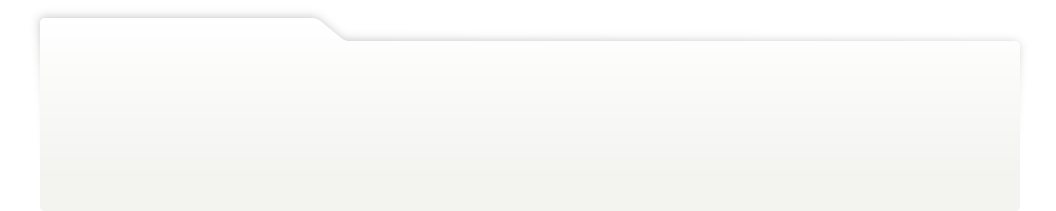
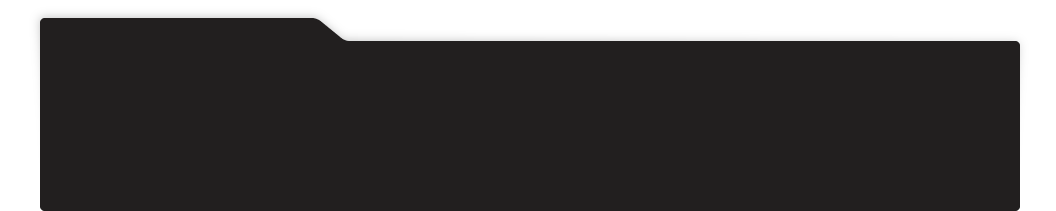
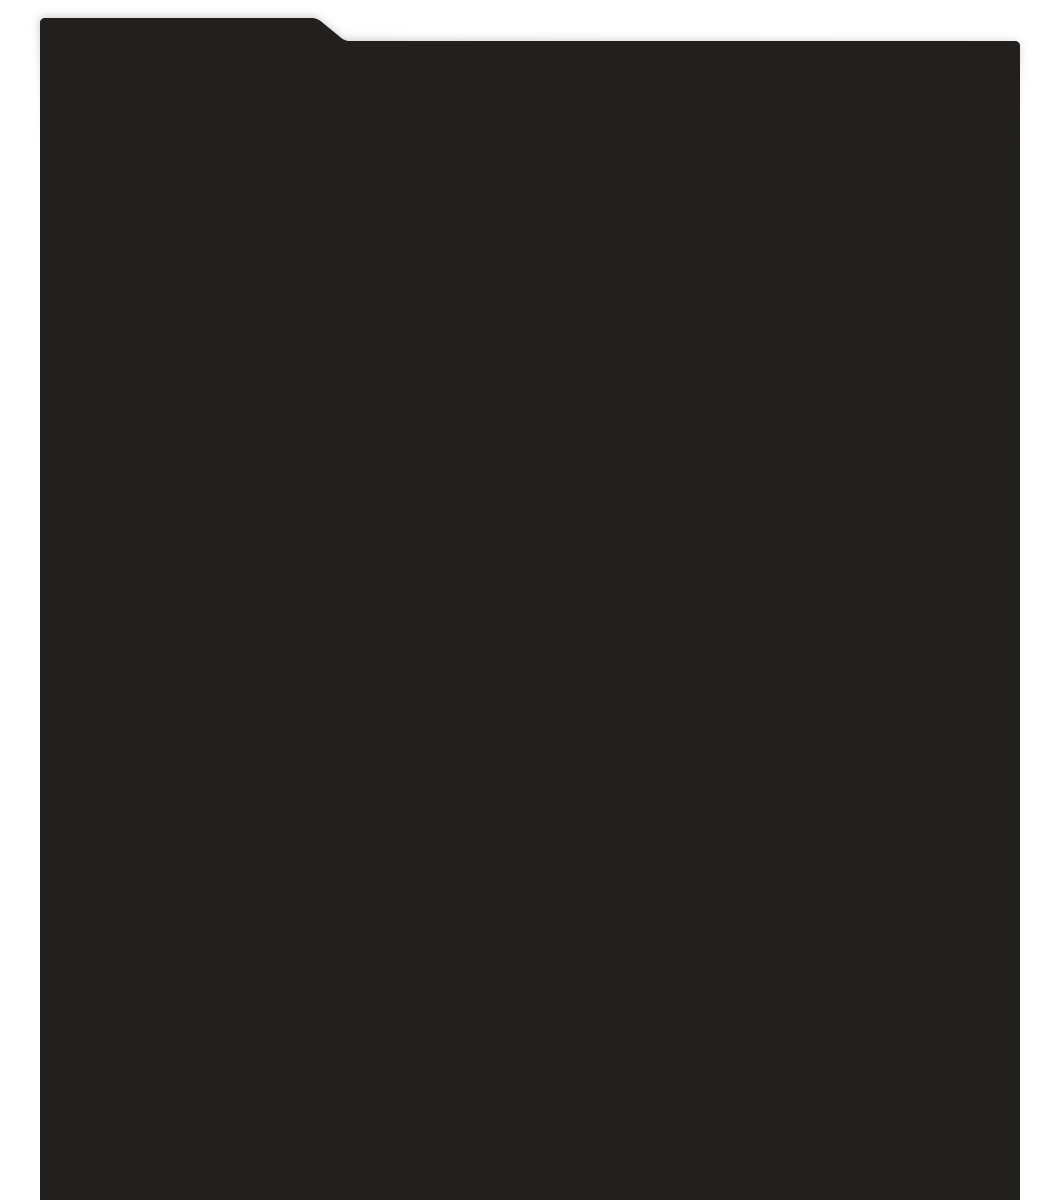
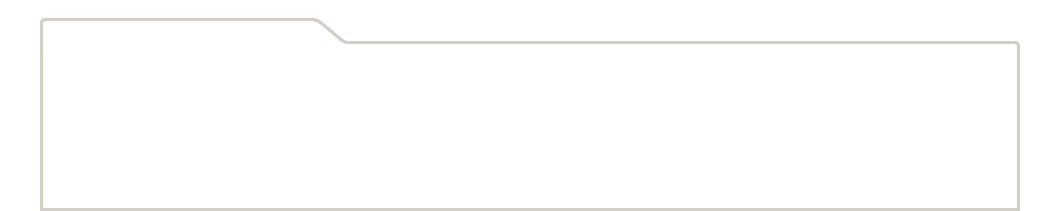
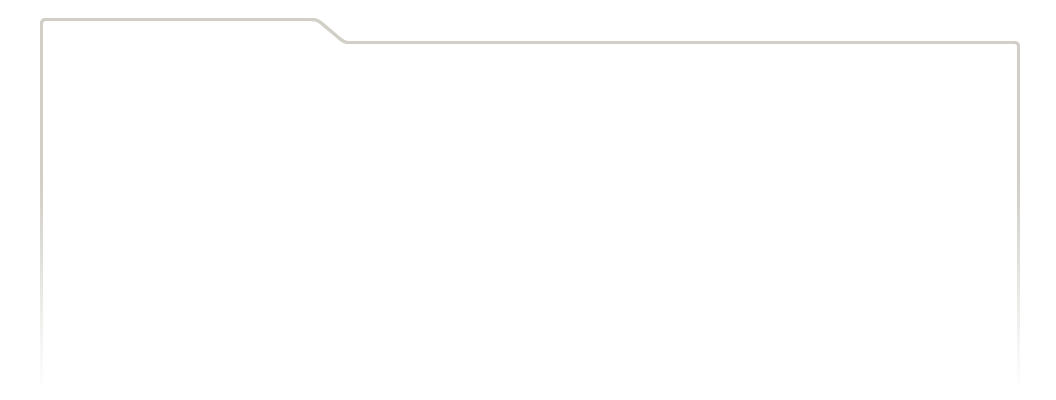
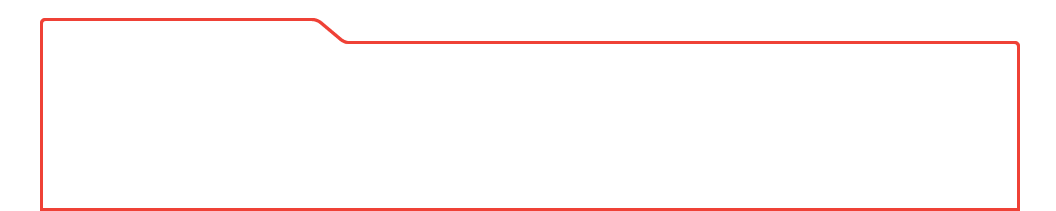
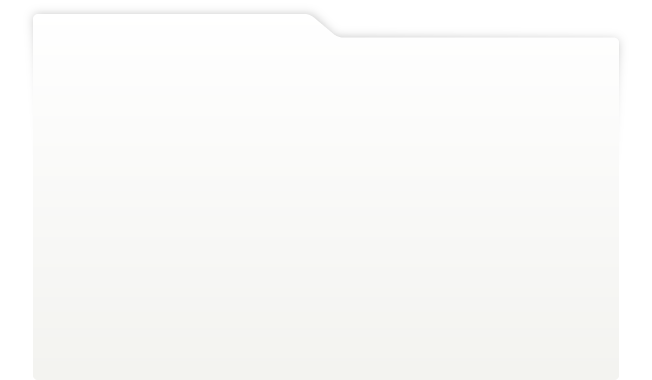
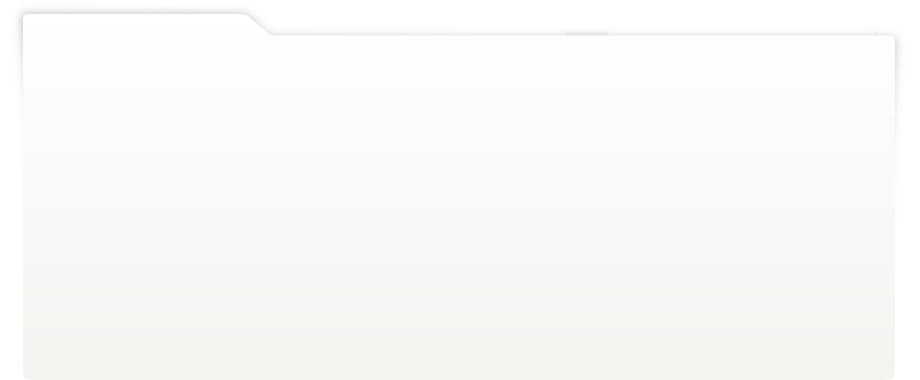
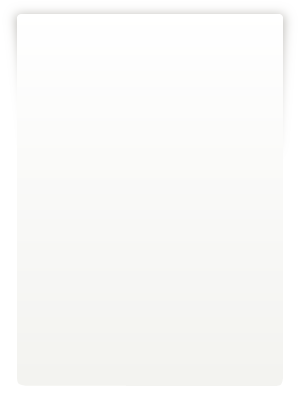
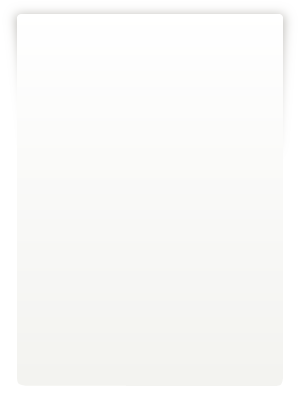
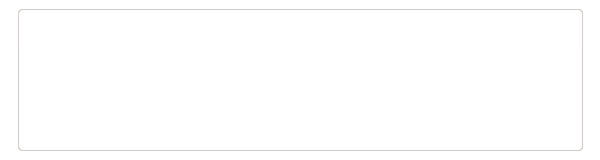
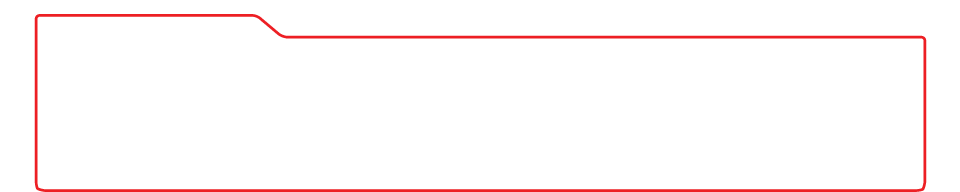
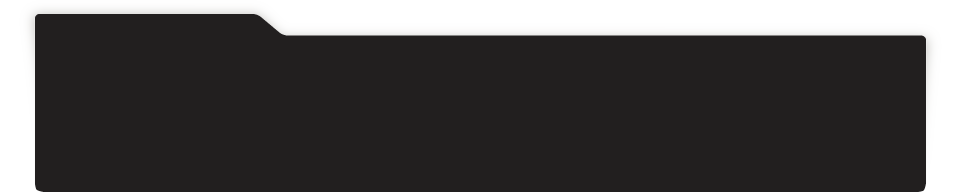
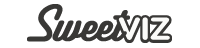
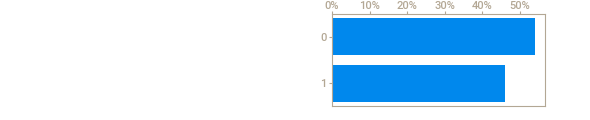
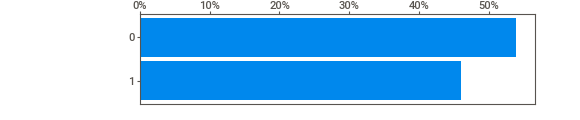
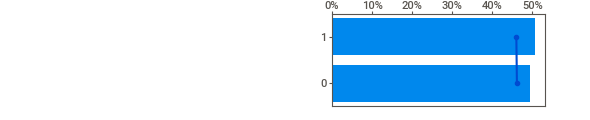
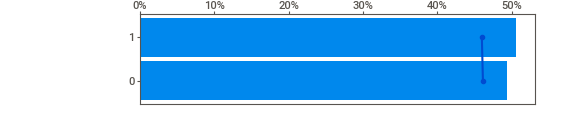
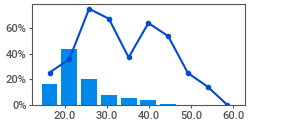
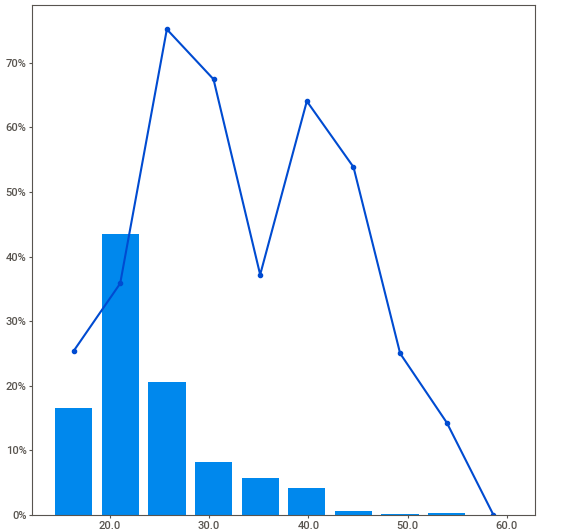
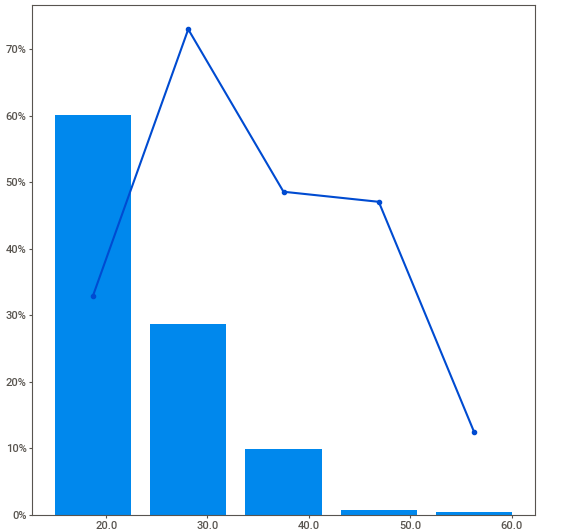
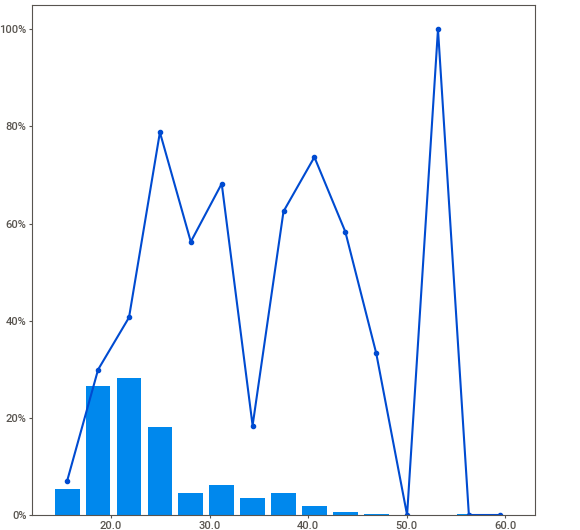
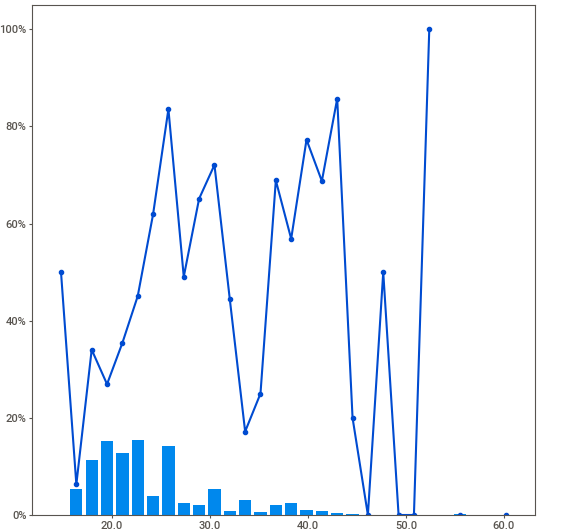
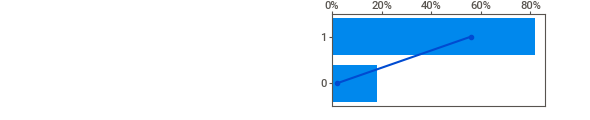
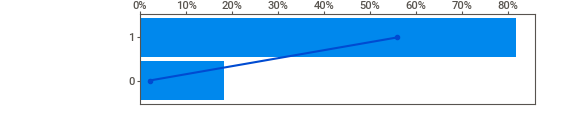
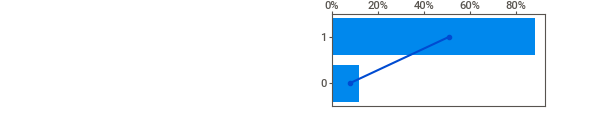
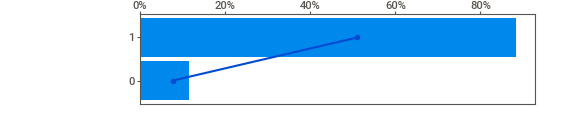
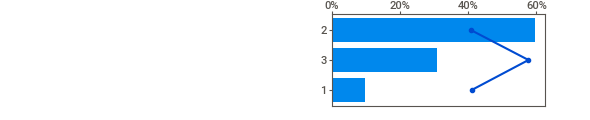
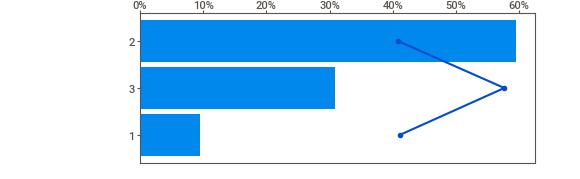
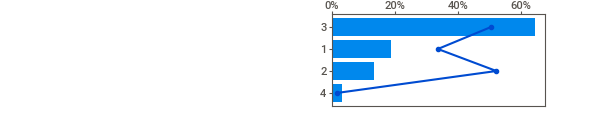
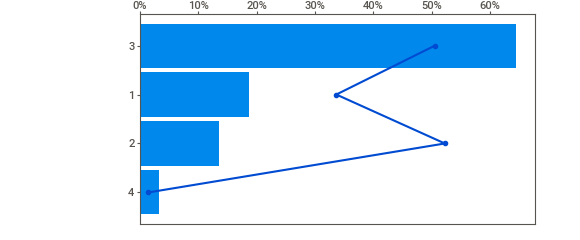
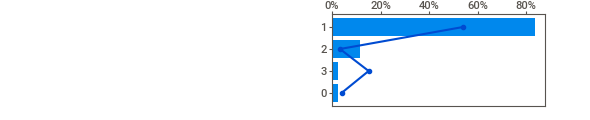
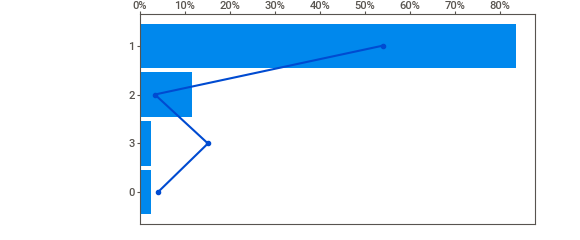
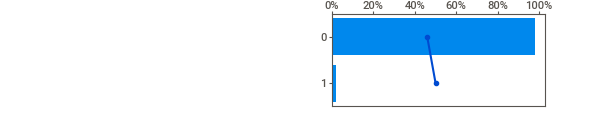
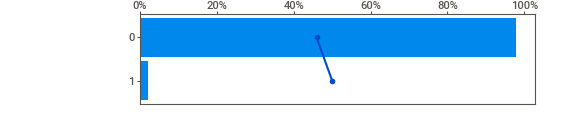
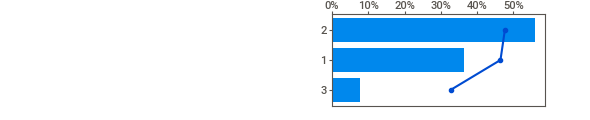
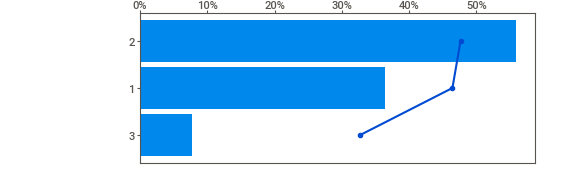
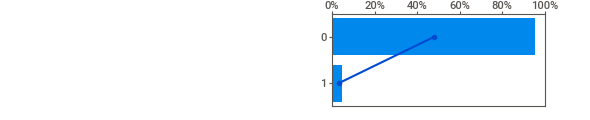
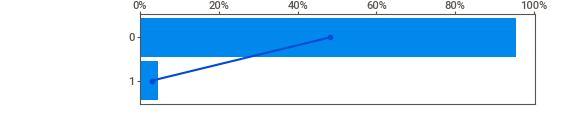
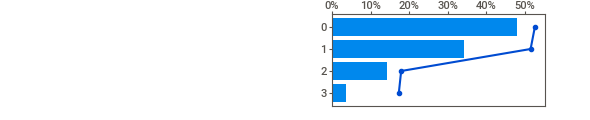
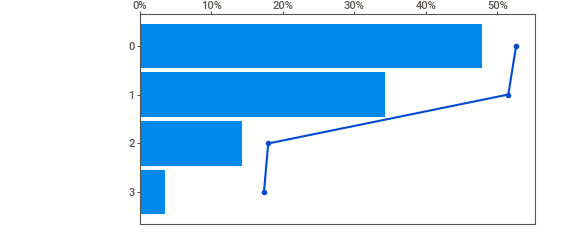
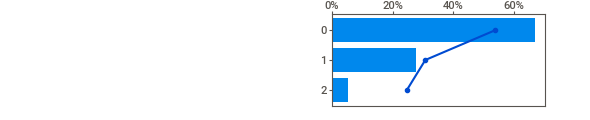
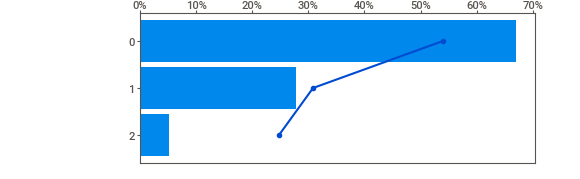
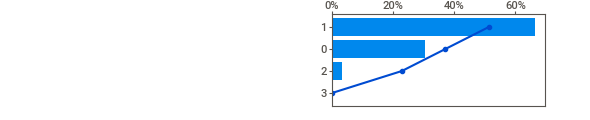
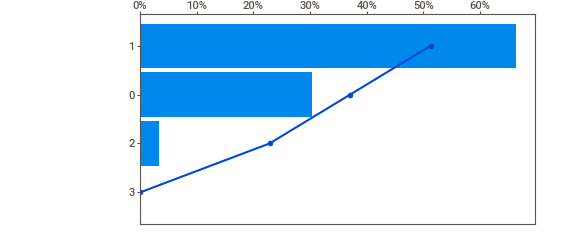
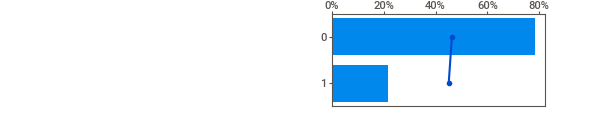
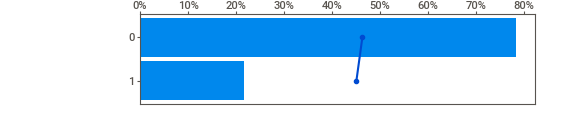
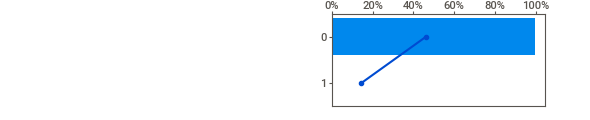
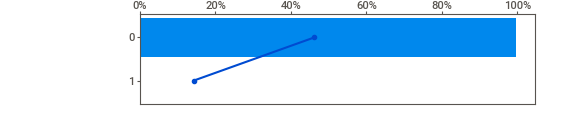
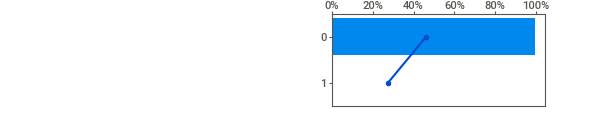
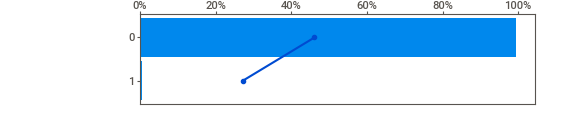
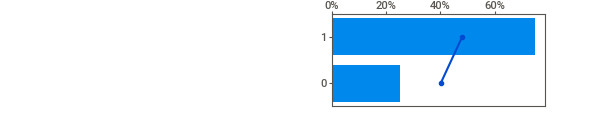
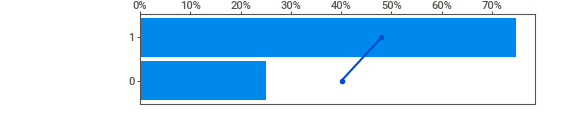
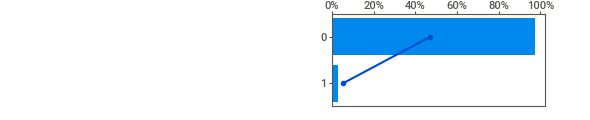
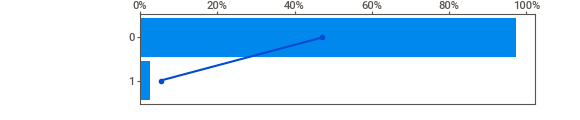
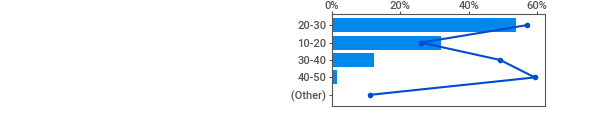
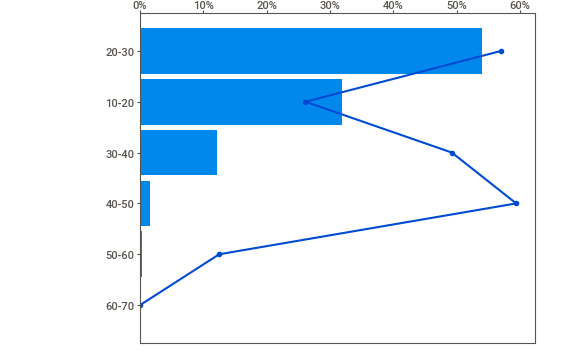
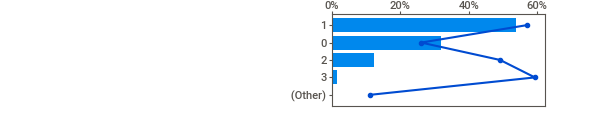
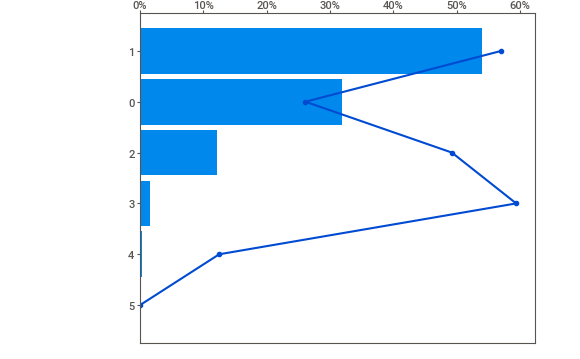
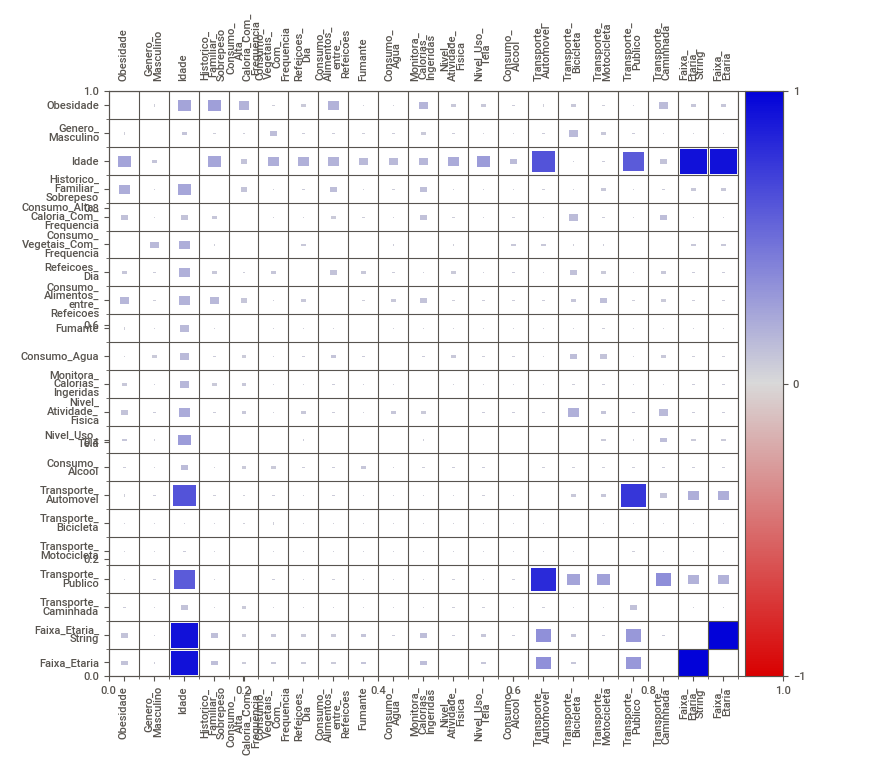
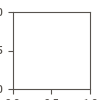

In [19]:
sv_obesidade_report.show_notebook()

### Bloco 2 - Treinamento do Modelo

#### Treinamento do Modelo - Baseline

Neste vídeo, vamos começar o treinamento do modelo. Vamos usar o modelo baseline, que é o modelo inicial a partir do qual vamos extrair uma métrica. Para isso, vamos dividir os dados em treino e teste usando o método train-test-split. Vamos remover as colunas que não serão utilizadas, como a coluna de idade e a coluna de faixa etária string. Em seguida, vamos treinar o modelo usando o GaussianNB, que é um modelo gaussiano associado à distribuição normal. Explico também sobre a abordagem de usar dois modelos de Naive Bayes quando se tem variáveis categóricas e quantitativas no mesmo dataset. Por fim, avaliamos as métricas do modelo baseline, como recall e matriz de confusão. O objetivo é maximizar o recall, que representa a capacidade do modelo de identificar corretamente os casos positivos.

In [20]:
# dividir dados de treino e teste
X = df_obesidade.drop(columns=['Obesidade', 'Idade', 'Faixa_Etaria_String'], axis=1)
y = df_obesidade['Obesidade']

# shuffle - dados embaralhados de forma aleatória para evitar influencia de possíveis ordenamentos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51, shuffle=True)

In [21]:
# treinamento do modelo
# é possível utilizar um modelo para cada tipo de variável (quantitativa e qualitativa)
model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)

GaussianNB()

In [22]:
# predizer valores do conjunto de testes
y_pred = model_baseline.predict(X_test)

In [23]:
# avaliar desempenho do modelo

# associar o relatório com os teste
classification_report_str = classification_report(y_test, y_pred)

# métrica do modelo

# parâmetro 'macro' dá o mesmo peso para as classes, pois não estão desbalanceada
recall_baseline = recall_score(y_test, y_pred, average='macro')

# exibir resultados
print(f'Relatório de Classificação: \n{classification_report_str}')
print(f'Recall: {recall_baseline}')

Relatório de Classificação: 
              precision    recall  f1-score   support

           0       0.94      0.60      0.73       339
           1       0.67      0.96      0.79       295

    accuracy                           0.76       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.76      0.76       634

Recall: 0.775901204939753


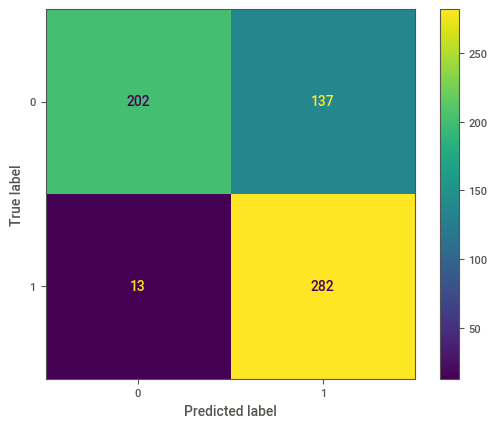

In [24]:
# exibir matrix de confusão
confusion_matrix_modelo_baseline = confusion_matrix(y_test, y_pred)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_modelo_baseline)
disp_modelo_baseline.plot()

#### Treinamento do Modelo - Seleção de Melhores Features

Nesta aula, vamos aprender sobre a seleção automatizada de features. Vamos usar o método SelectK Best, que seleciona as K melhores features de um dataset com base em um teste estatístico chamado qui-quadrado. Vamos criar uma variável kbest e treiná-la para selecionar as 5 melhores features do nosso conjunto de treinamento. Em seguida, vamos transformar o conjunto de treinamento usando essas features selecionadas. Vamos descobrir quais foram as features selecionadas e treinar um modelo usando apenas essas features. Por fim, vamos avaliar as métricas do modelo e compará-las com o modelo baseline.

In [25]:
# Select Kbest - seleciona as K melhores features, baseado em teste
kbest = SelectKBest(score_func=chi2, k=8)
kbest

SelectKBest(k=8, score_func=<function chi2 at 0x000001B5A3E8E660>)

In [26]:
X_train_kbest = kbest.fit_transform(X_train, y_train)
X_train_kbest

array([[0, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 2],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 2],
       [1, 1, 3, ..., 1, 0, 1],
       [1, 1, 1, ..., 0, 0, 1]], dtype=int64)

In [27]:
# seleção de features
kbest_features = kbest.get_support(indices=True)
X_train_best_features = X_train.iloc[:, kbest_features]
X_train_best_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1477 entries, 301 to 2105
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Historico_Familiar_Sobrepeso         1477 non-null   int64   
 1   Consumo_Alta_Caloria_Com_Frequencia  1477 non-null   int64   
 2   Consumo_Alimentos_entre_Refeicoes    1477 non-null   int64   
 3   Monitora_Calorias_Ingeridas          1477 non-null   int64   
 4   Nivel_Atividade_Fisica               1477 non-null   int32   
 5   Nivel_Uso_Tela                       1477 non-null   int32   
 6   Transporte_Caminhada                 1477 non-null   int64   
 7   Faixa_Etaria                         1477 non-null   category
dtypes: category(1), int32(2), int64(5)
memory usage: 82.4 KB


In [28]:
# treinar modelo com as melhores features
modelo_kbest = GaussianNB()
modelo_kbest.fit(X_train_best_features, y_train)
modelo_kbest

GaussianNB()

In [29]:
# filtrar as features dos dados
X_test_kbest = kbest.transform(X_test)
X_train_best_features = X_test.iloc[:, kbest_features]

In [30]:
# predizer valores do conjunto de testes
y_pred_kbest = modelo_kbest.predict(X_train_best_features)

In [31]:
# avaliar desempenho do modelo

# associar o relatório com os teste
classification_report_str = classification_report(y_test, y_pred_kbest)

# métrica do modelo

# parâmetro 'macro' dá o mesmo peso para as classes, pois não estão desbalanceada
recall_baseline = recall_score(y_test, y_pred_kbest, average='macro')

# exibir resultados
print(f'Relatório de Classificação (KBest): \n{classification_report_str}')
print(f'Recall (KBest): {recall_baseline}')

Relatório de Classificação (KBest): 
              precision    recall  f1-score   support

           0       0.94      0.61      0.74       339
           1       0.68      0.95      0.79       295

    accuracy                           0.77       634
   macro avg       0.81      0.78      0.76       634
weighted avg       0.82      0.77      0.76       634

Recall (KBest): 0.780105994700265


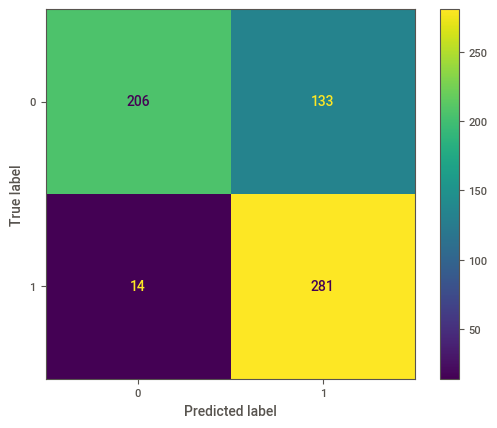

In [32]:
# exibir matrix de confusão
confusion_matrix_modelo_kbest = confusion_matrix(y_test, y_pred_kbest)
disp_modelo_baseline = ConfusionMatrixDisplay(confusion_matrix_modelo_kbest)
disp_modelo_baseline.plot()

### Bloco 3 - Otimização de Hiperparêmetros

#### Criação da Função

Neste vídeo, vamos começar a ajustar os hiperparâmetros do modelo. Vamos usar a biblioteca Optuna para fazer uma busca randômica e encontrar a melhor configuração de hiperparâmetros para obter o maior recall possível. Vou mostrar como construir essa busca usando o Optuna e explicar como funciona o conceito de otimização multi-objetivo. Vamos definir uma função que será chamada pelo Optuna e dentro dela faremos todo o processo de treinamento do modelo, extração da métrica de recall e definição do maior recall. Em seguida, vamos executar o estudo de hiperparâmetros usando o Optuna e um sampler de grid para percorrer o conjunto finito de valores do hiperparâmetro. Por fim, vamos rodar o experimento e ver os resultados das diferentes configurações testadas.

In [33]:
# ajustar hiperparêmetros do SelectKBest

def naivebayes_optuna(trial):

    # k = k melhores features conforme chi_2
    k = trial.suggest_int('k', 1, 18)

    kbest = SelectKBest(score_func=chi2, k=k)

    X_train_kbest = kbest.fit_transform(X_train, y_train)

    kbest_features = kbest.get_support(indices=True)
    X_train_best_features = X_train.iloc[:, kbest_features]

    # treinar modelo com melhores features
    model_kbest_optuna = GaussianNB()
    model_kbest_optuna.fit(X_train_best_features, y_train)

    # aplicar o seletor de features no conjunto de testes
    X_test_kbest = kbest.transform(X_test)
    X_test_best_features = X_test.iloc[:, kbest_features]

    # predizer valores
    y_pred_kbest = model_kbest_optuna.predict(X_test_best_features)

    # avaliar recall
    recall_optuna = recall_score(y_test, y_pred_kbest, average='macro')

    return k, recall_optuna

In [34]:
# rodar o estudo dos hiperparâmetros
search_space = {'k': range(1, 19)}
study_naivebayes = optuna.create_study(sampler=optuna.samplers.GridSampler(
    search_space=search_space), directions=['minimize', 'maximize'])
study_naivebayes.optimize(naivebayes_optuna, n_trials=50) # type: ignore

[I 2024-04-24 18:36:11,430] A new study created in memory with name: no-name-3867649c-5420-4c99-bc50-8a95c8e56c8d
[I 2024-04-24 18:36:11,456] Trial 0 finished with values: [1.0, 0.6140192990350483] and parameters: {'k': 1}. 
[I 2024-04-24 18:36:11,475] Trial 1 finished with values: [9.0, 0.775681215939203] and parameters: {'k': 9}. 
[I 2024-04-24 18:36:11,492] Trial 2 finished with values: [16.0, 0.7742062896855157] and parameters: {'k': 16}. 
[I 2024-04-24 18:36:11,523] Trial 3 finished with values: [4.0, 0.6952202389880506] and parameters: {'k': 4}. 
[I 2024-04-24 18:36:11,542] Trial 4 finished with values: [10.0, 0.780105994700265] and parameters: {'k': 10}. 
[I 2024-04-24 18:36:11,584] Trial 5 finished with values: [2.0, 0.6659517024148793] and parameters: {'k': 2}. 
[I 2024-04-24 18:36:11,608] Trial 6 finished with values: [12.0, 0.7727313634318285] and parameters: {'k': 12}. 
[I 2024-04-24 18:36:11,644] Trial 7 finished with values: [3.0, 0.6138143092845358] and parameters: {'k':

#### Análise

Nesta aula, discutimos sobre a otimização de hiperparâmetros usando o SelectKBest. Explicamos que o K define a quantidade de variáveis ou features e como incluir o objeto KBest na função para obter resultados diferentes. Mostramos como analisar os valores retornados, identificar o melhor resultado e o melhor hiperparâmetro. Também apresentamos um gráfico que mostra o cruzamento dos objetivos de K e recall. Por fim, mostramos as 8 melhores features selecionadas e como salvar o modelo otimizado. Na próxima aula, aprenderemos a expor esse modelo como uma API usando uma abordagem diferente do FastAPI.

In [35]:
# mostrar melhor resultado

trial_with_best_recall = max(study_naivebayes.best_trials, key=lambda t: t.values[1])
print('Trial com maior recall e menor k: ')
print(f'\ttrial number: {trial_with_best_recall.number}')
print(f'\tparam (k): {trial_with_best_recall.params}')
print(f'\tvalues (k, recall): {trial_with_best_recall.values}')


Trial com maior recall e menor k: 
	trial number: 12
	param (k): {'k': 8}
	values (k, recall): [8.0, 0.780105994700265]


In [36]:
# exibir chart com trials
fig = optuna.visualization.plot_pareto_front(study_naivebayes)
fig.show()

In [43]:
# salvar modelo
joblib.dump(modelo_kbest, '../data/model_nb_obesity.plk')

['../data/model_nb_obesity.plk']